# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
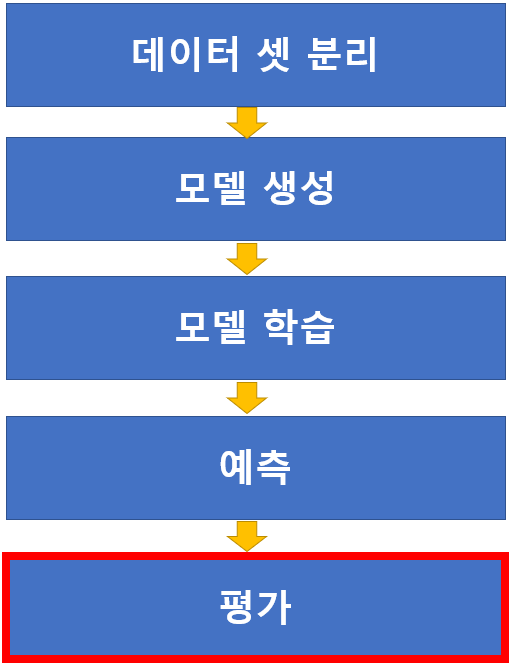

## 분류와 회귀의 평가방법
### 분류 평가 방법
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. ROC와 AUC

### 회귀 평가방법
1. MSE (Mean Squareed Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 
- sklearn.metrics 모듈

# 분류(Classification) 평가
## 용어
- 이진 분류에서 양성과 음성
    - 양성: 예측하려는 대상
    - 음성: 예측대상이 아닌 것
    - 예
        - 암환자 분류 : 양성 - 암 환자, 음성 - 정상인
        - 스팸메일 분류 : 양성 - 스팸메일, 음성 - 정상메일
        
## 정확도 (Accuracy)

$$
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- accuracy_score(예측, 정답)

### Accuracy 평가지표의 문제
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.


## MNIST Data set
- 손글씨 데이터 셋
- 사이킷런 제공 image size: 8 X 8 
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경한다.
- Positive(양성): 9
- Negative(음성): 0 ~ 8

### 훈련, 테스트 데이터셋 분할

### 모델 생성 및 학습

### 모델 평가

### 다수의 클래스로 예측하면 높은 정확도를 가진다.
- 만약 0.1 : 99.9 의 비율이라면 (ex: 암환자)  그냥 정상인이라고 해도 99.9 %의 정확도가 나올 것이다.
- 이게 좋은 모델인가?  0.1의 암환자는 분류해 내지 못한다. 결국 환자를 찾지 못하면 완전 꽝인 모델인 것이다. 
- 그래서 정확도는 **불균형 레이블 데이터세트**의 평가지표로 사용하면 안됨. 다른 평가지표가 필요
==> 혼돈 행렬(Confusion Matrix) 과 재현률, 정밀도

## 혼동 행렬(Confusion Marix)
- 이진분류의 평가지표의 기준으로 사용된다.
- 혼동행렬을 이용해 다양한 평가지표(정확도, 재현률, 정밀도, F1 점수, AUC 점수)를 계산할 수 있다.
- 함수: confusion_matrix(답, 예측)
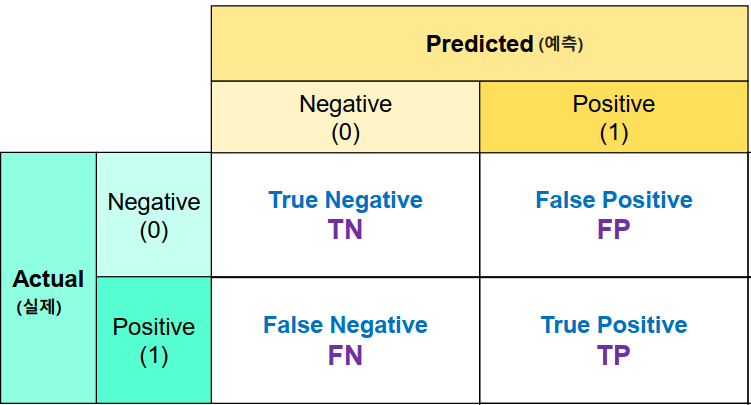

![img](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

- TP(True Positive) - 맞는 것을 올바르게 맞다고 예측한 것
- TN(True Negative) - 아닌 것을 올바르게 틀리다고 예측한 것
- FP(False Positive) - 아닌 것을 올바르지 않게 맞다고 예측한 것
- FN(False Negative) - 맞는 것을 올바르지 않게 틀리다고 예측한 것

## Recall(재현율)과 Precision(정밀도)
- 양성 데이터 세트의 예측 성능에 초점을 맞춘 평가 지표
- Recall/Sensitivity(재현율/민감도) : 실제 Positive(양성)인 것 중에 Positive로 예측 한 것의 비율
- Precision(정밀도) : Positive(양성)으로 예측 한 것 중 실제 Positive인 건수의 비율.

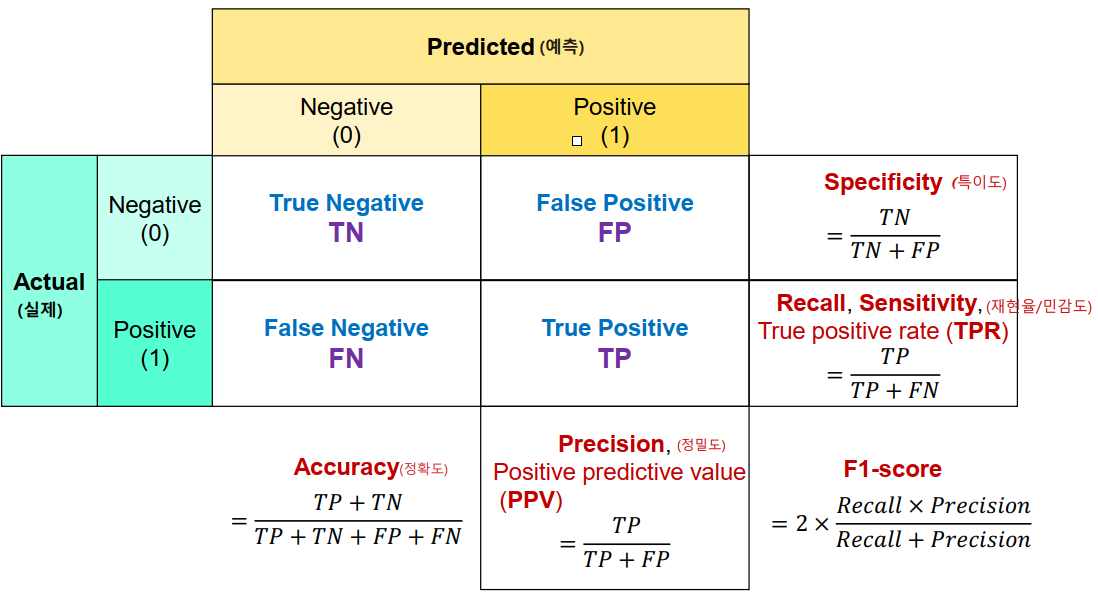

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈에 있다.
- **confusion_matrix(y, y 예측값)**
- **recall_score(y, y 예측값)** 
    - Positive 중 Positive로 예측한 비율 (TPR)
- **precision_score(y, y 예측값)**
    - Positive로 예측한 것중 Positive인 것의 비율
- **f1_score(y, y 예측값)**
    - recall과 precision의 조화 평균값. 
    - recall과 precision은 상충관계이므로 하나가 높으면 다른 하나는 낮은 값을 가지게 된다. 그 둘간의 조화평균을 계산 한 값

### Dummy 모델 혼동행렬

### Dummy 모델 Accuracy, Recall, Precision, F1-Score

### 머신러닝 모델을 이용해 학습

## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

#### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델
- 함수: precision_score(답, 예측)

#### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우
- FP(False Positive)를 낮추는데 춧좀을 맞춘다.
- 스팸메일 판정
- 함수: recall_score(답, 예측)

## 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- 임계값 : 모델이 분류의 답을 결정할 때 기준값
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다. (ex: 암환자 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 암환자로 예측하게 된다.)
    
### 정밀도와 재현율 상충관계(Trade off)
- 임계값 변경을 통해 정밀도를 높이면 재현율이 떨어지고 재현율을 높이면 정밀도는 낮아진다.


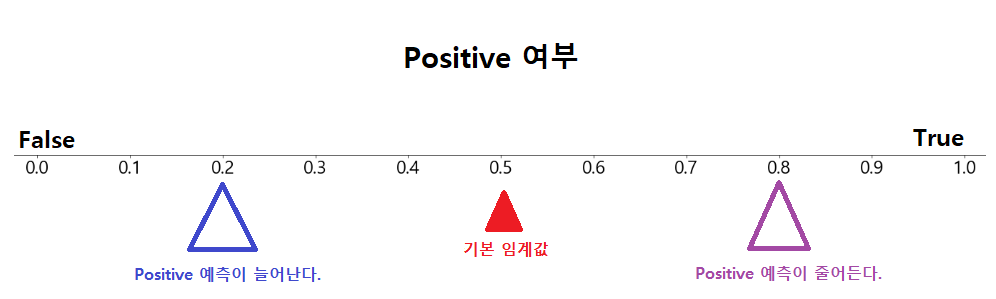

### Binarizer - 임계값 변경
- Transformer로 양성 여부를 선택하는 임계값을 변경할 수 있다.

## ROC 곡선과 AUC
이진 분류 모델 성능 측정에서 중요하게 사용되는 지표.
- **FPR(False Positive Rage):**
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FR}{TN+FP}
    $$
- **TPR(True Positive Rate):** 재현율
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$
- **ROC 곡선**
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
- **AUC**
    - ROC 곡선 아래쪽 면적
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

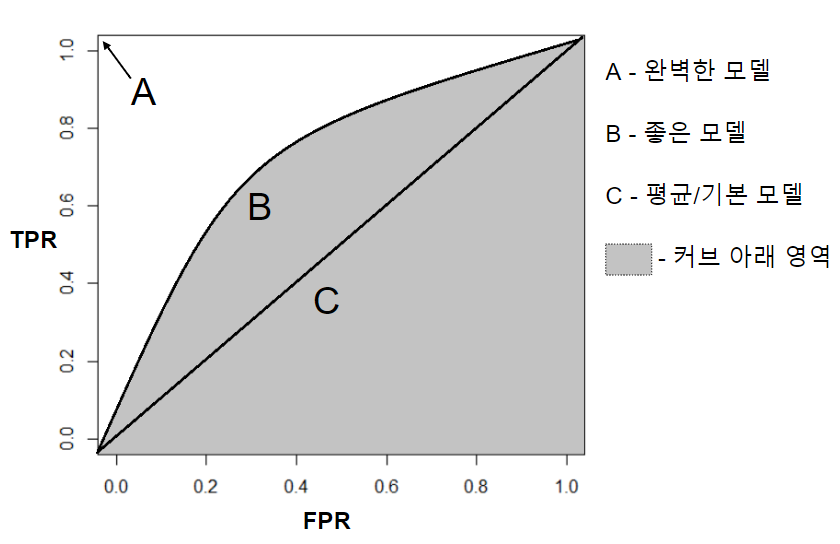

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, ACU  확인
- roc_curve(y값, 예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, 예측확률) : AUC 점수 반환